<a href="https://colab.research.google.com/github/diptivs/machine_learning/blob/master/GMM_On_Label0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#GMM Based on Labels from K-Mean

In this colab I will be running GMM on the Label0 clusters. This cluster was the output of K-mean on full dataset

In [0]:
# Import required libraries
import pandas as pd
from sklearn.cluster import KMeans
from math import sqrt
import numpy as np

from pylab import plot,show
from numpy import vstack,array
from numpy.random import rand
import numpy as np
from scipy.cluster.vq import kmeans,vq
import pandas_datareader as dr
from matplotlib import pyplot as plt

import seaborn as sns
from datetime import datetime

### Generate Labels on original Dataset

Below code explains how Labels were added to original dataset and saved as new CSV

#####Load Dataset

In [0]:
# Setup google auth
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# load the file
file_id = '1riBaT9mQD_yx-1zoKILkiRXZOEkeCxES'
downloaded = drive.CreateFile({'id':file_id}) 
downloaded.GetContentFile('emails_parsed_sentiment_n_stock_nlp.csv')  
data_in = pd.read_csv('emails_parsed_sentiment_n_stock_nlp.csv', index_col="id")

#Create the data to be clustered based on selected coloumns from dataframe
data = np.asarray([np.asarray(data_in['ChangePercent']), np.asarray(data_in['compound'])]).T
X = data

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#####Plot Elbow

Text(0.5, 1.0, 'Elbow curve')

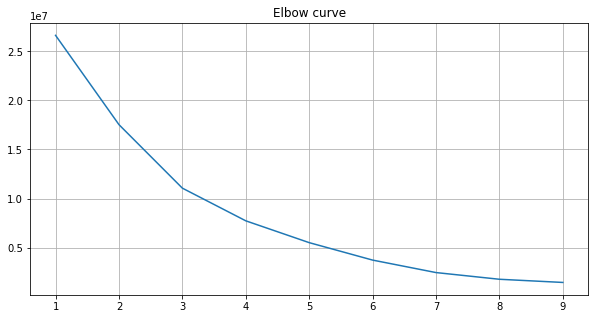

In [0]:

#Plot the elbow to find the value of K
distorsions = []
for k in range(1, 10):
    k_means = KMeans(n_clusters=k)
    k_means.fit(X)
    distorsions.append(k_means.inertia_)
fig = plt.figure(figsize=(10, 5))
plt.plot(range(1, 10), distorsions)
plt.grid(True)
plt.title('Elbow curve')

#####K-mean on dataset

[0 0 0 ... 3 0 1]


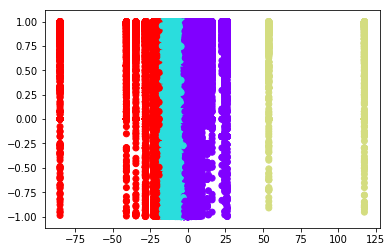

In [0]:
#Run K-Mean clustering on data and plot it
kmeans = KMeans(n_clusters = 4).fit(X)
centroids = kmeans.cluster_centers_
print(kmeans.labels_)
plt.scatter(X[:,0],X[:,1], c = kmeans.labels_, cmap ="rainbow")
plt.show()

#####Create LABEL coloumn based on K-mean clustering

In [0]:
#Create the Labels Coloumn and save dataset to new CSV
data_in['LABEL'] = kmeans.labels_
export_csv = data_in.to_csv (r'emails_parsed_sentiment_n_stock_nlp_Kmean_Labels.csv', index = 'id', header=True) #Don't forget to add '.csv' at the end of the path

#Save new CSV to Googe Drive
from google.colab import drive
drive.mount('drive')

!cp emails_parsed_sentiment_n_stock_nlp_Kmean_Labels.csv drive/My\ Drive/

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at drive


###Start processing the LABELed dataset
I worked on **LABEL0**

#####Load Dataset with LABELs

In [0]:
# Setup google auth
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# load the file
file_id = '1-7NtDS3z9iiaGONsHfU8vX1EtuKNM07O'
downloaded = drive.CreateFile({'id':file_id}) 
downloaded.GetContentFile('emails_parsed_sentiment_n_stock_nlp_Kmean_Labels.csv')  
data_in = pd.read_csv('emails_parsed_sentiment_n_stock_nlp_Kmean_Labels.csv',index_col='id')


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#####Select the data with LABEL value =0 for further clustering

In [0]:
r,c = data_in.shape
print(r,c)

label0_data= data_in.loc[data_in['LABEL'] == 0]

r,c = label0_data.shape
print(r,c)
data = np.asarray([np.asarray(label0_data['ChangePercent']), np.asarray(label0_data['compound'])]).T

X = data

517401 26
412116 26


#####Plot Elbow on LABEL0 dataset

Text(0.5, 1.0, 'Elbow curve')

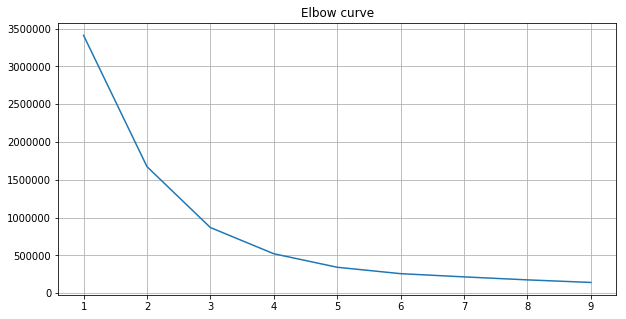

In [0]:
#Plot elbow for Label0 data to know the appropriate value for K
distorsions = []
for k in range(1, 10):
    k_means = KMeans(n_clusters=k)
    k_means.fit(X)
    distorsions.append(k_means.inertia_)
fig = plt.figure(figsize=(10, 5))
plt.plot(range(1, 10), distorsions)
plt.grid(True)
plt.title('Elbow curve')

#####Plot K-Mean for Label0

[0 0 0 ... 0 2 1]


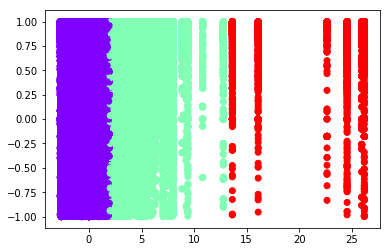

In [0]:
kmeans = KMeans(n_clusters = 3).fit(X)
centroids = kmeans.cluster_centers_
print(kmeans.labels_)
plt.scatter(X[:,0],X[:,1], c = kmeans.labels_, cmap ="rainbow")
plt.show()

#####Plot GMM for LABEL0

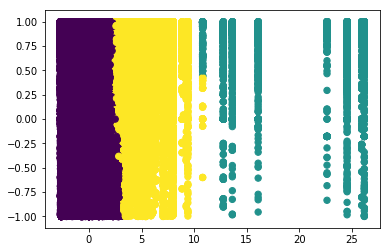

In [0]:

from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

###Plot Corelation

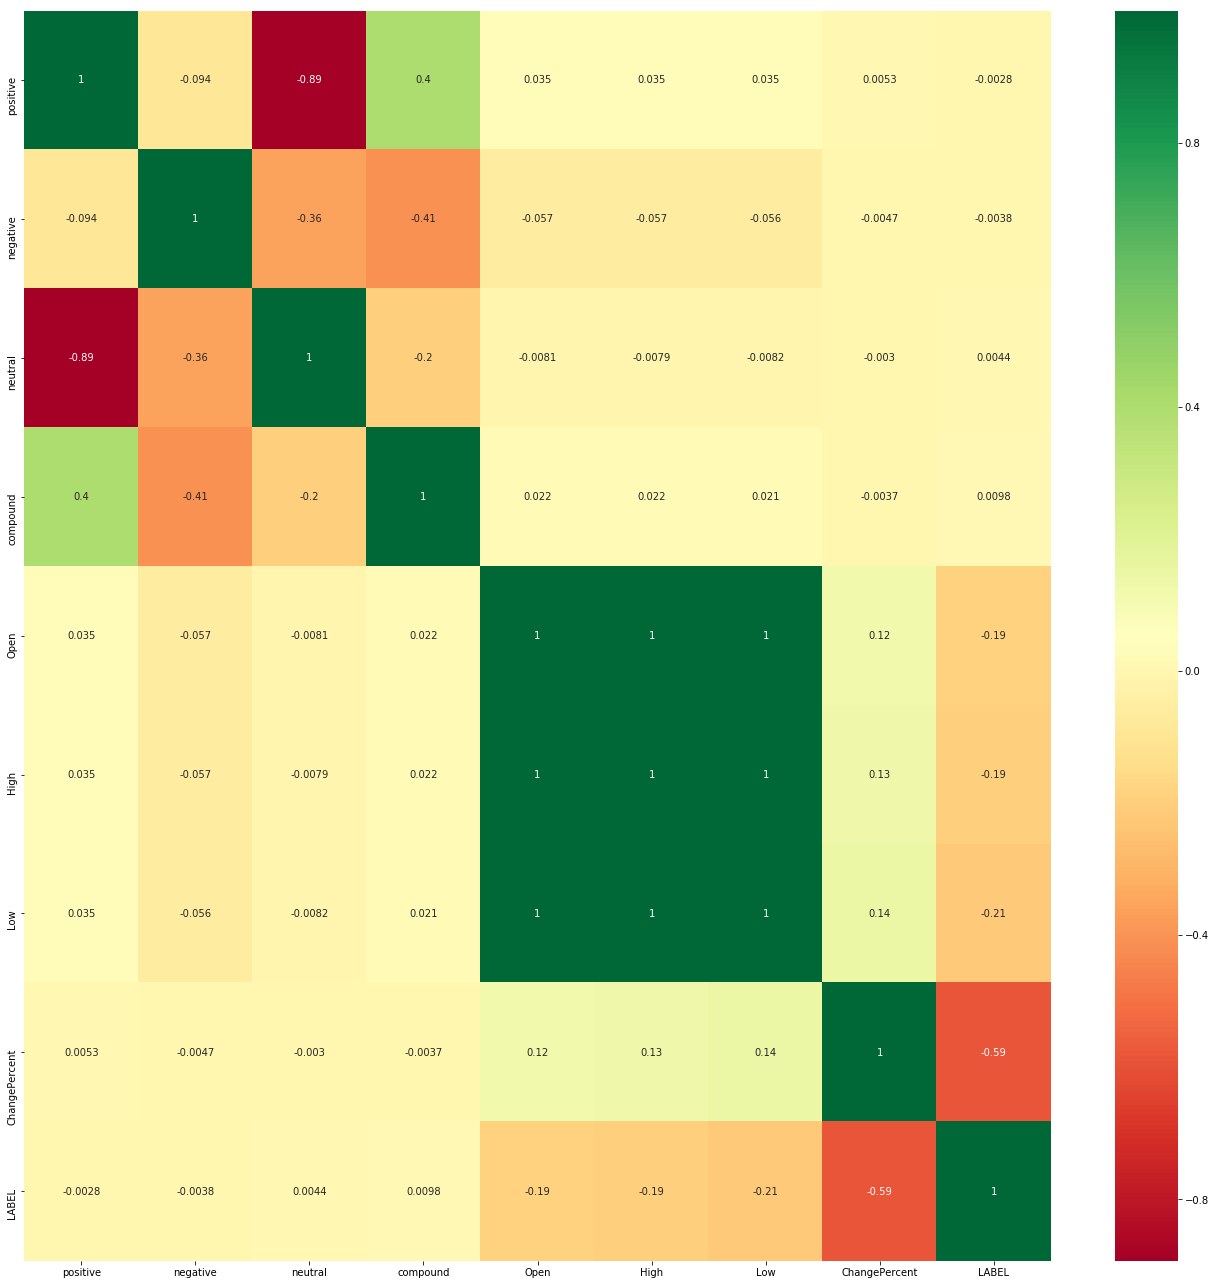

In [0]:

X = data_in.iloc[:,0:23]  #independent columns
y = data_in.iloc[:,-1]    #target column i.e price range
#get correlations of each features in dataset
corrmat = data_in.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(23,23))
#plot heat map
g=sns.heatmap(data_in[top_corr_features].corr(),annot=True,cmap="RdYlGn")

###Conclusion

- The k-mean clustering did not give any correlation between emotions in mail Vs stock prices
- The clustering on each Label generated by K-Mean also did not give any correlation
- Correlation Heatmap is also tried

With these observations it is clear that data needs further processing and cleansing. Next action items are:
- Look for quaterly results announced for enron and filter the mail and stock data a week before and after that date.
- Cluster the data based on Topic of mail
- Form the network graph of mails based on "to" and from"